In [4]:
#Problem 1 - Data Read, Write and Inspect:
import pandas as pd

# Task 1: Load the dataset
file_path = r"D:\Jupyter Notebook\bank.csv"
df = pd.read_csv(file_path)

# Task 2: DataFrame info and analysis
# 2(a): Columns with dtype=object
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:", object_columns)

# 2(b): Unique values of those columns
for col in object_columns:
    print(f"Unique values in '{col}':", df[col].unique())

# 2(c): Total number of null values in each column
null_values = df.isnull().sum()
print("Total number of null values in each column:")
print(null_values)

# Task 3: Drop object columns and save new DataFrame
df_numeric = df.drop(columns=object_columns)
output_file_path = r"D:\Jupyter Notebook\banknumericdata.csv"
df_numeric.to_csv(output_file_path, index=False)
print(f"Numeric DataFrame saved to {output_file_path}")

# Task 4: Read new CSV and find summary statistics
numeric_data = pd.read_csv(output_file_path)
summary_statistics = numeric_data.describe()
print("Summary Statistics:")
print(summary_statistics)


Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in 'y': ['no' 'yes']
Total number of null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing 

In [5]:
#Problem 2 - Data Imputations:
import pandas as pd

# Task 1: Load the dataset
file_path = r"D:\Jupyter Notebook\medical_students_dataset.csv"
df = pd.read_csv(file_path)

# Task 2: Check info and identify columns with missing values
print("DataFrame Information:")
print(df.info())

# Identify columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

# Task 3: Impute missing values
# Analyze each column and decide imputation technique
for column, null_count in missing_columns.items():
    print(f"\nAnalyzing column: {column}")
    if df[column].dtype == 'object':  # Categorical column
        # Impute with the most frequent value (mode)
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)  # Reassign the filled column
        print(f"Filled missing values in '{column}' with mode: {mode_value}")
    else:  # Numeric column
        # Impute with mean for simplicity
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)  # Reassign the filled column
        print(f"Filled missing values in '{column}' with mean: {mean_value}")

# Task 4: Check for duplicate values
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Drop duplicate rows
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows removed. New dataset shape: {df.shape}")

# Save the cleaned dataset for reference (optional)
output_file_path = r"D:\Jupyter Notebook\medical_students_cleaned.csv"
df.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height          

In [8]:
import pandas as pd

# Load the Titanic dataset
file_path = r"D:\Jupyter Notebook\Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Task 1: Create a subset DataFrame for the specified columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Task 2: Retain only the rows where Pclass == 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Task 3: Calculate the mean, median, maximum, and minimum of the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Display the results
print(f"Mean of 'Fare' for first-class passengers: {mean_fare}")
print(f"Median of 'Fare' for first-class passengers: {median_fare}")
print(f"Maximum of 'Fare' for first-class passengers: {max_fare}")
print(f"Minimum of 'Fare' for first-class passengers: {min_fare}")


Mean of 'Fare' for first-class passengers: 84.1546875
Median of 'Fare' for first-class passengers: 60.287499999999994
Maximum of 'Fare' for first-class passengers: 512.3292
Minimum of 'Fare' for first-class passengers: 0.0


In [9]:
import pandas as pd

# Load the Titanic dataset
file_path = r"D:\Jupyter Notebook\Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Create a subset DataFrame for the specified columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only the rows where Pclass == 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Count the number of null values in the 'Age' column
null_count_age = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count_age}")

# Drop rows with null values in the 'Age' column
cleaned_df = first_class_df.dropna(subset=['Age'])
print(f"Shape of the DataFrame after dropping null values: {cleaned_df.shape}")

# Display the cleaned DataFrame (optional)
print(cleaned_df.head())


Number of null values in the 'Age' column: 30
Shape of the DataFrame after dropping null values: (186, 6)
                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


In [10]:
import pandas as pd

# Load the Titanic dataset
file_path = r"D:\Jupyter Notebook\Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Task 1: Apply one-hot encoding to the 'Embarked' column
one_hot_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Task 2: Add the new columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Task 3: Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# Task 4: Print the first few rows of the modified DataFrame to verify the changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


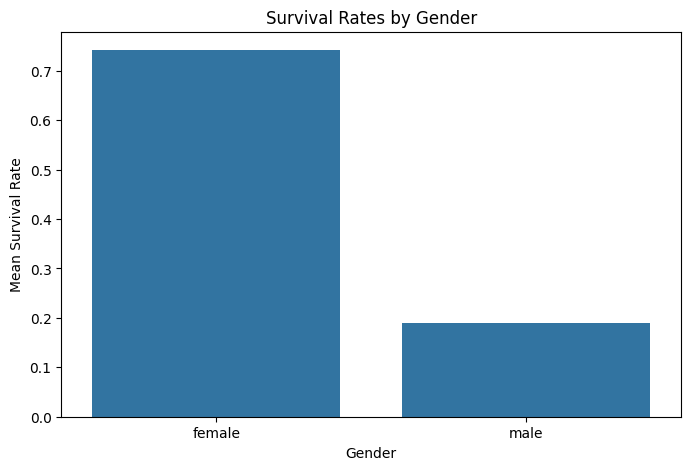

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset into a DataFrame (ensure the correct file path)
file_path = r"D:\Jupyter Notebook\Titanic-Dataset.csv"  # Updated file path

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Group by 'Sex' and calculate the mean survival rate for each gender
    survival_by_gender = data.groupby('Sex')['Survived'].mean()

    # Print the mean survival rates
    print(survival_by_gender)

    # Visualize the survival distribution by gender using a seaborn barplot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
    plt.title('Survival Rates by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Mean Survival Rate')
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


Mean Survival Rates by Gender and Embarkation Port:
  Embarked     Sex  Survived
0        C  female  0.876712
1        C    male  0.305263
2        Q  female  0.750000
3        Q    male  0.073171
4        S  female  0.689655
5        S    male  0.174603


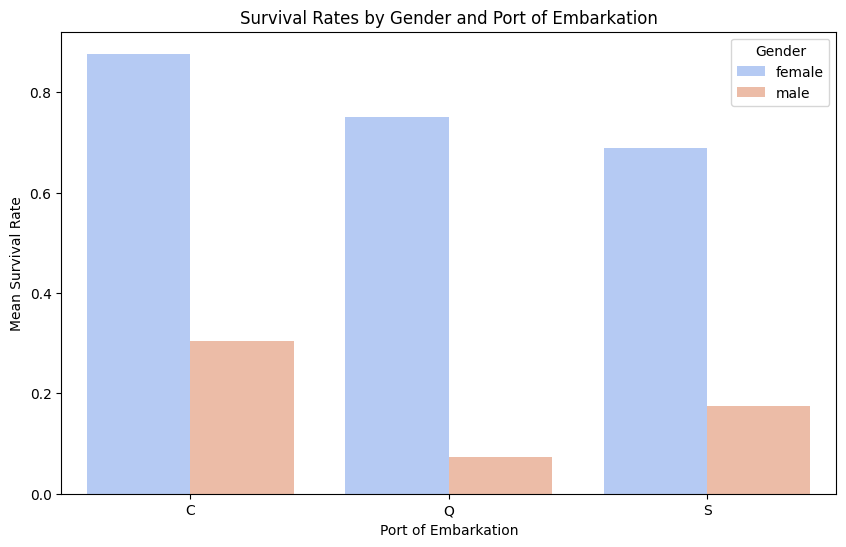

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"D:\Jupyter Notebook\Titanic-Dataset.csv"

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Group by 'Embarked' and 'Sex' to calculate the mean survival rate
    survival_by_gender_port = data.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

    # Print the survival rates
    print("Mean Survival Rates by Gender and Embarkation Port:")
    print(survival_by_gender_port)

    # Visualize survival rates broken down by gender and port of embarkation
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Embarked', y='Survived', hue='Sex', data=survival_by_gender_port, palette='coolwarm')
    plt.title('Survival Rates by Gender and Port of Embarkation')
    plt.xlabel('Port of Embarkation')
    plt.ylabel('Mean Survival Rate')
    plt.legend(title='Gender')
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


    Pclass AgeGroup  Survived
0        1       Q1  0.809524
1        1       Q2  0.761905
2        1       Q3  0.666667
3        1       Q4  0.777778
4        1       Q5  0.506667
5        2       Q1  0.742857
6        2       Q2  0.400000
7        2       Q3  0.416667
8        2       Q4  0.461538
9        2       Q5  0.363636
10       3       Q1  0.333333
11       3       Q2  0.197674
12       3       Q3  0.283582
13       3       Q4  0.166667
14       3       Q5  0.088235


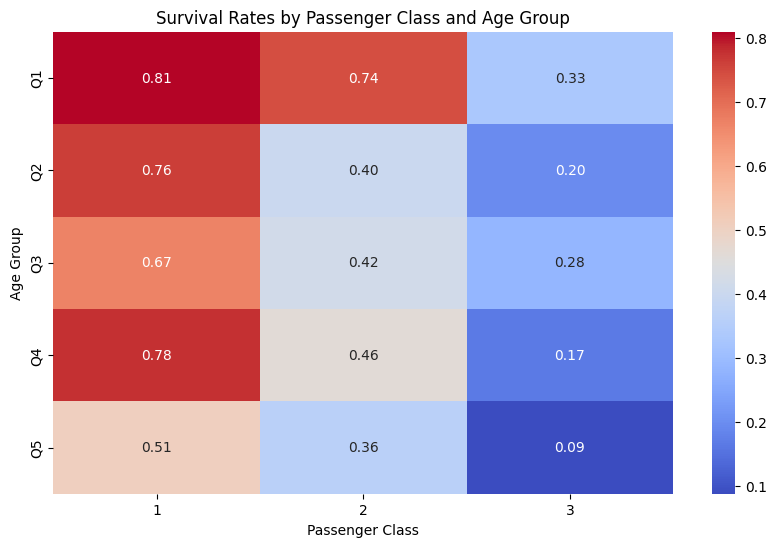

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset into a DataFrame (update file path)
file_path = r"D:\Jupyter Notebook\Titanic-Dataset.csv"

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Break 'Age' into five quantiles
    age_quantiles = pd.qcut(data['Age'], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
    data['AgeGroup'] = age_quantiles

    # Group by 'Pclass' and 'AgeGroup' to calculate the mean survival rate
    survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'], observed=False)['Survived'].mean().reset_index()

    # Print the mean survival rates by class and age group
    print(survival_by_class_age)

    # Pivot the data for the heatmap
    survival_pivot = survival_by_class_age.pivot_table(index='AgeGroup', columns='Pclass', values='Survived', observed=False)

    # Visualize the survival rates by passenger class and age group
    plt.figure(figsize=(10, 6))
    sns.heatmap(survival_pivot, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Survival Rates by Passenger Class and Age Group')
    plt.xlabel('Passenger Class')
    plt.ylabel('Age Group')
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")
